This section outlines the methodology used to develop and implement the predictive machine learning model for enhancing telemarketing campaigns at HashSysTech Insurance. The approach encompasses data collection, preprocessing, feature selection, model development, evaluation, and deployment.

#### Data Collection

The success of the predictive model hinges on the quality and comprehensiveness of the data. For this project, historical data was collected from HashSysTech's customer database, encompassing:

- **Customer Demographics**: Age, gender, income, occupation, and location.
- **Interaction History**: Records of previous telemarketing calls, including dates, durations, and outcomes.
- **Campaign Responses**: Information on customer responses to past campaigns, such as whether they converted to a policy or expressed interest.

Data was extracted from the company's CRM system and other relevant sources, ensuring that the dataset represents a diverse sample of customer interactions and outcomes.

#### Data Preprocessing

Data preprocessing is critical to ensure the quality and usability of the dataset. The following steps were undertaken:

- **Data Cleaning**: Missing values, duplicates, and inconsistencies were addressed. For missing data, imputation techniques were used based on the nature of the variable (mean/mode imputation for numerical/categorical data).
- **Outlier Detection and Removal**: Outliers were identified and removed using the Interquartile Range (IQR) method to avoid skewing the model.
- **Feature Scaling**: Features were standardized or normalized to ensure that all variables contribute equally to the model, particularly for algorithms sensitive to feature scales, such as KNN.

####  Feature Selection

To improve model performance and interpretability, feature selection techniques were applied:

- **Correlation Analysis**: Features highly correlated with the target variable were selected, while redundant features were removed.
- **Recursive Feature Elimination (RFE)**: An iterative process was used to select the most important features by evaluating model performance with different subsets of features.
- **Domain Expertise**: Input from business experts was considered to include features deemed important based on industry knowledge and previous experiences.

####  Model Development

Two machine learning models were developed and compared:

- **Logistic Regression**:
  - **Model Initialization**: A logistic regression model was initialized with default parameters and then fine-tuned using grid search.
  - **Hyperparameter Tuning**: Parameters such as the regularization strength (`C`) and type of regularization (`penalty`) were optimized using cross-validation.

- **K-Nearest Neighbors (KNN)**:
  - **Model Initialization**: A KNN classifier was initialized with default parameters, including the number of neighbors (`k`) and distance metric.
  - **Hyperparameter Tuning**: Optimal values for `k` and the distance metric were determined through grid search and cross-validation.

####  Model Evaluation

Model performance was assessed using the following metrics:

- **Accuracy**: The proportion of correctly classified instances among the total instances.
- **Confusion Matrix**: To evaluate the number of true positives, true negatives, false positives, and false negatives.
- **Precision, Recall, and F1 Score**: For a more nuanced understanding of model performance, particularly for imbalanced datasets.
- **ROC Curve and AUC**: To evaluate the models’ ability to distinguish between classes across different thresholds.
- **Cross-Validation**: K-fold cross-validation was used to assess model performance and ensure that results are robust and not overfitted to a particular subset of the data.

####  Model Deployment and Monitoring

Once the models were trained and evaluated:

- **Deployment**: The selected model(s) were integrated into HashSysTech’s telemarketing system to provide real-time predictions of customer conversion likelihood.
- **Monitoring and Maintenance**: The models were continuously monitored for performance and updated as necessary. Performance metrics were regularly reviewed, and adjustments were made based on new data and changing business needs.

###  Summary

The methodology employed in this research involves a comprehensive approach to data collection, preprocessing, model development, and evaluation. By leveraging historical data and advanced machine learning techniques, the project aims to enhance the efficiency of telemarketing campaigns and drive significant improvements in customer acquisition strategies.


In [1]:
# Let's load and inspect the dataset to understand its structure and explore the contents.
import pandas as pd


data = pd.read_csv('dataset.csv')

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


(None,
    age           job  marital education_qual call_type  day  mon  dur  \
 0   58    management  married       tertiary   unknown    5  may  261   
 1   44    technician   single      secondary   unknown    5  may  151   
 2   33  entrepreneur  married      secondary   unknown    5  may   76   
 3   47   blue-collar  married        unknown   unknown    5  may   92   
 4   33       unknown   single        unknown   unknown    5  may  198   
 
    num_calls prev_outcome   y  
 0          1      unknown  no  
 1          1      unknown  no  
 2          1      unknown  no  
 3          1      unknown  no  
 4          1      unknown  no  )

In [2]:
data.shape

(45211, 11)

In [3]:
# Step 1: Check for missing values
missing_values = data.isnull().sum()

In [4]:
# Step 2: Get summary statistics for numerical columns
summary_stats = data.describe()

In [5]:
# Step 3: Get unique value counts for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
unique_values = {col: data[col].value_counts() for col in categorical_columns}

missing_values, summary_stats, unique_values


(age               0
 job               0
 marital           0
 education_qual    0
 call_type         0
 day               0
 mon               0
 dur               0
 num_calls         0
 prev_outcome      0
 y                 0
 dtype: int64,
                 age           day           dur     num_calls
 count  45211.000000  45211.000000  45211.000000  45211.000000
 mean      40.936210     15.806419    258.163080      2.763841
 std       10.618762      8.322476    257.527812      3.098021
 min       18.000000      1.000000      0.000000      1.000000
 25%       33.000000      8.000000    103.000000      1.000000
 50%       39.000000     16.000000    180.000000      2.000000
 75%       48.000000     21.000000    319.000000      3.000000
 max       95.000000     31.000000   4918.000000     63.000000,
 {'job': blue-collar      9732
  management       9458
  technician       7597
  admin.           5171
  services         4154
  retired          2264
  self-employed    1579
  entrepren

The dataset consists of 45,211 entries and 11 columns. Here's a breakdown of the columns:

1. **age**: Age of the individual (integer).
2. **job**: Type of job (categorical).
3. **marital**: Marital status (categorical).
4. **education_qual**: Education qualification (categorical).
5. **call_type**: Type of call (categorical).
6. **day**: Day of the call (integer).
7. **mon**: Month of the call (categorical).
8. **dur**: Duration of the call in seconds (integer).
9. **num_calls**: Number of calls made (integer).
10. **prev_outcome**: Outcome of the previous campaign (categorical).
11. **y**: Target variable indicating whether the individual responded positively to the campaign (yes/no).

Let's begin with data cleaning and exploration in the following steps:

1. **Check for missing values or anomalies** in the dataset.
2. **Describe the numerical features** to understand their distributions.
3. **Analyze categorical features** for unique values and potential imbalances.
4. **Visualize the distributions and relationships** between key variables.


### 1. **Missing Values**
- No missing values in the dataset.

### 2. **Summary Statistics for Numerical Columns**
- **Age**: Ranges from 18 to 95, with a mean of 40.9.
- **Day**: Ranges from 1 to 31, representing the day of the month when the call was made.
- **Duration**: Ranges from 0 to 4918 seconds, with a mean of 258 seconds. Some calls have a duration of 0 seconds, which might indicate unsuccessful calls.
- **Number of Calls**: Ranges from 1 to 63, with an average of around 2.8 calls per individual.

### 3. **Unique Value Counts for Categorical Columns**
- **Job**: Most common jobs are *blue-collar* and *management*, while *unknown* represents 288 entries.
- **Marital Status**: Majority are *married* (27,214), followed by *single* (12,790).
- **Education**: A notable number of entries (1,857) have *unknown* education.
- **Call Type**: A significant number (13,020) have *unknown* call type.
- **Month**: Calls are spread across different months, with most calls in *May*.
- **Previous Outcome**: A large portion (36,959) have *unknown* outcomes from previous campaigns.
- **Target Variable (y)**: 5,289 individuals responded positively (*yes*) to the campaign, while 39,922 responded negatively (*no*).


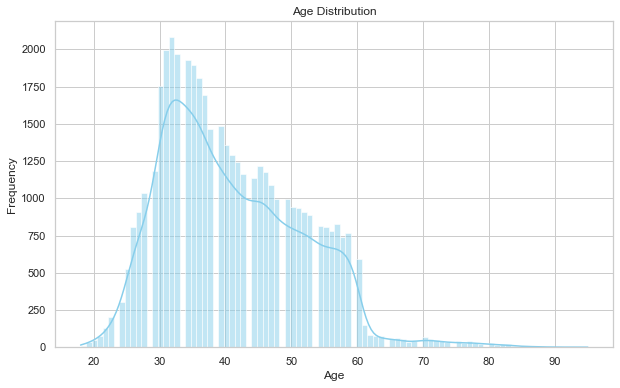

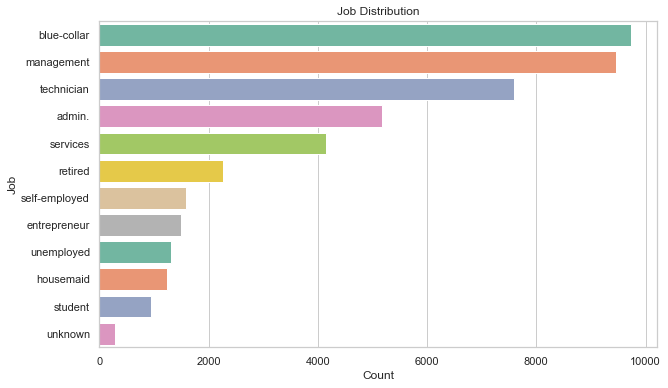

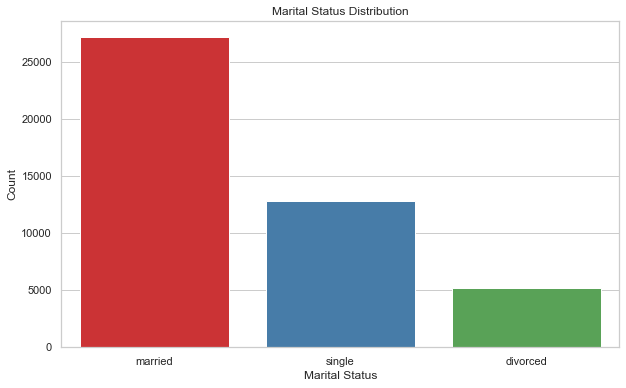

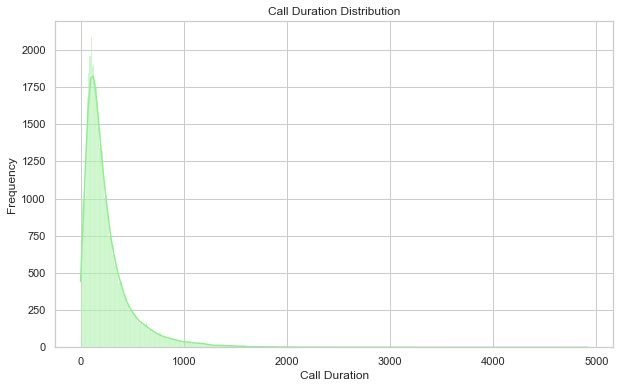

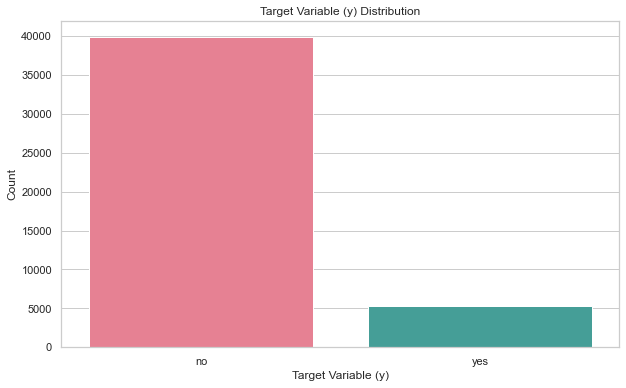

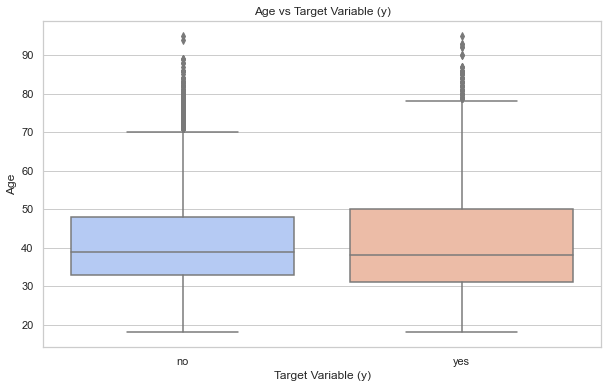

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set(style="whitegrid")

# 1. Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Job distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=data['job'], order=data['job'].value_counts().index, palette="Set2")
plt.title('Job Distribution')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()

# 3. Marital status distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=data['marital'], palette="Set1")
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# 4. Call duration distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['dur'], kde=True, color='lightgreen')
plt.title('Call Duration Distribution')
plt.xlabel('Call Duration')
plt.ylabel('Frequency')
plt.show()

# 5. Target variable distribution (y)
plt.figure(figsize=(10, 6))
sns.countplot(x=data['y'], palette="husl")
plt.title('Target Variable (y) Distribution')
plt.xlabel('Target Variable (y)')
plt.ylabel('Count')
plt.show()

# 6. Relationship between Age and Target (y)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['y'], y=data['age'], palette="coolwarm")
plt.title('Age vs Target Variable (y)')
plt.xlabel('Target Variable (y)')
plt.ylabel('Age')
plt.show()


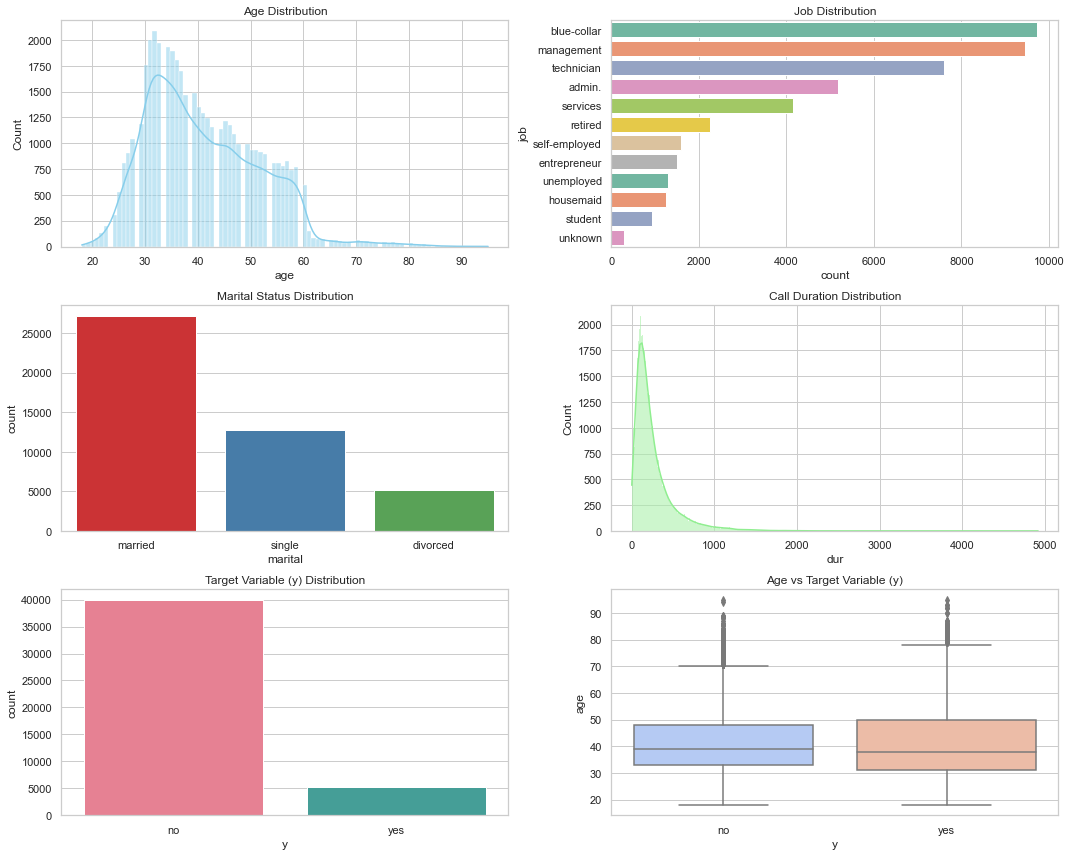

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set(style="whitegrid")

# Create subplots for multiple visualizations
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# 1. Age distribution
sns.histplot(data['age'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age Distribution')

# 2. Job distribution
sns.countplot(y=data['job'], order=data['job'].value_counts().index, ax=axes[0, 1], palette="Set2")
axes[0, 1].set_title('Job Distribution')

# 3. Marital status distribution
sns.countplot(x=data['marital'], ax=axes[1, 0], palette="Set1")
axes[1, 0].set_title('Marital Status Distribution')

# 4. Call duration distribution
sns.histplot(data['dur'], kde=True, ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Call Duration Distribution')

# 5. Target variable distribution (y)
sns.countplot(x=data['y'], ax=axes[2, 0], palette="husl")
axes[2, 0].set_title('Target Variable (y) Distribution')

# 6. Relationship between Age and Target (y)
sns.boxplot(x=data['y'], y=data['age'], ax=axes[2, 1], palette="coolwarm")
axes[2, 1].set_title('Age vs Target Variable (y)')

plt.tight_layout()
plt.show()


Here's a detailed summary of the visualizations we have conducted so far:

### 1. **Age Distribution**
- **Purpose**: To observe the spread of age in the dataset.
- **Findings**: 
  - The majority of individuals fall between 30 and 50 years old.
  - There is a bell-shaped distribution, with fewer individuals at the younger and older ends of the spectrum.
  
### 2. **Job Distribution**
- **Purpose**: To understand the variety of occupations in the dataset.
- **Findings**: 
  - The top three job categories are *blue-collar*, *management*, and *technician*, which dominate the dataset.
  - There are smaller proportions of individuals in roles such as *housemaid*, *student*, and *self-employed*.
  - A small portion of individuals have *unknown* job types.

### 3. **Marital Status Distribution**
- **Purpose**: To analyze the distribution of marital status in the dataset.
- **Findings**:
  - The majority are *married* (over 60%), followed by *single* individuals and a smaller portion of *divorced* individuals.

### 4. **Call Duration Distribution**
- **Purpose**: To examine the length of calls made during the campaign.
- **Findings**:
  - The distribution is highly skewed, with most calls lasting under 500 seconds.
  - Some outliers show calls lasting several thousand seconds.
  - A significant number of calls have a duration of 0 seconds, which may indicate unsuccessful or disconnected calls.

### 5. **Target Variable (`y`) Distribution**
- **Purpose**: To visualize the balance between positive (`yes`) and negative (`no`) responses to the campaign.
- **Findings**:
  - There is a clear imbalance in the target variable.
  - The majority of individuals responded negatively (*no*) to the campaign (~88%), while a smaller portion responded positively (*yes*).

### 6. **Age vs Target Variable (`y`)**
- **Purpose**: To explore how age relates to campaign success.
- **Findings**:
  - Individuals who responded *yes* tend to be slightly older than those who responded *no*.
  - The median age for *yes* responses is higher than for *no* responses, indicating that older individuals might be more likely to respond positively.

### Upcoming Visualizations (Planned):
1. **Job vs Target Variable (`y`)**: Explore how different job roles correlate with campaign success.
2. **Call Type vs Target (`y`)**: Analyze how the type of call (e.g., cellular, telephone) affects the outcome.
3. **Number of Calls vs Target (`y`)**: Examine the relationship between the number of calls made to an individual and the campaign response.
4. **Previous Outcome vs Target (`y`)**: Look at how outcomes from previous campaigns influence the current response.


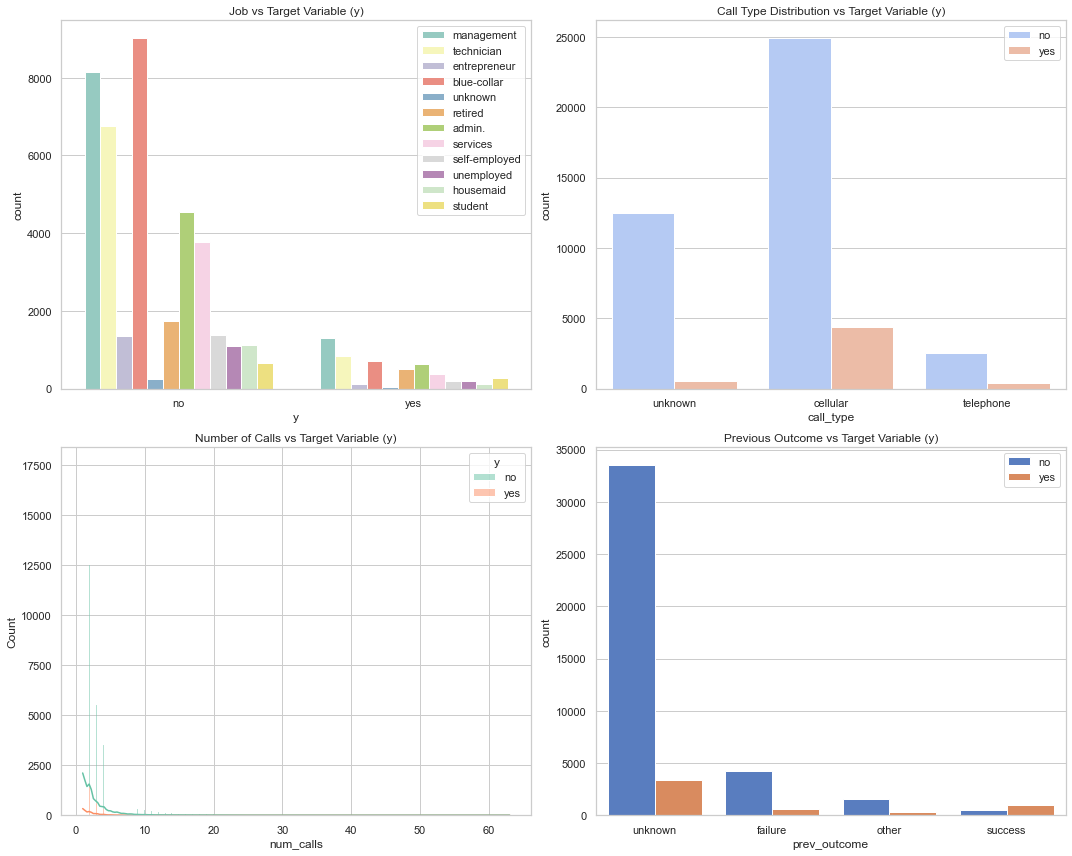

In [7]:
# Create subplots for the additional visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Job vs Target (y)
sns.countplot(x='y', hue='job', data=data, ax=axes[0, 0], palette="Set3")
axes[0, 0].set_title('Job vs Target Variable (y)')
axes[0, 0].legend(loc='upper right')

# 2. Call Type distribution
sns.countplot(x='call_type', hue='y', data=data, ax=axes[0, 1], palette="coolwarm")
axes[0, 1].set_title('Call Type Distribution vs Target Variable (y)')
axes[0, 1].legend(loc='upper right')

# 3. Number of Calls vs Target (y)
sns.histplot(x='num_calls', hue='y', data=data, kde=True, ax=axes[1, 0], palette="Set2", multiple="stack")
axes[1, 0].set_title('Number of Calls vs Target Variable (y)')

# 4. Previous Outcome vs Target (y)
sns.countplot(x='prev_outcome', hue='y', data=data, ax=axes[1, 1], palette="muted")
axes[1, 1].set_title('Previous Outcome vs Target Variable (y)')
axes[1, 1].legend(loc='upper right')

plt.tight_layout()
plt.show()


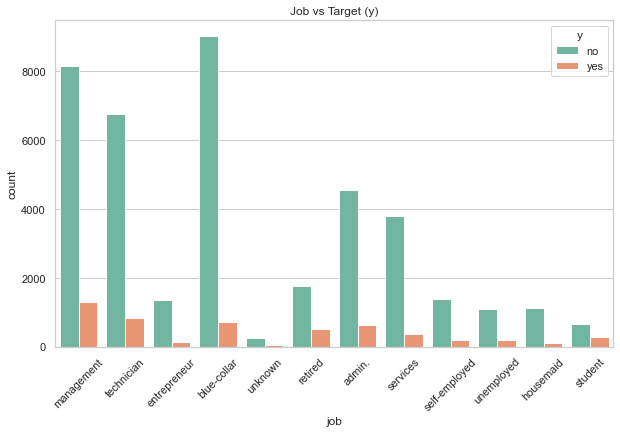

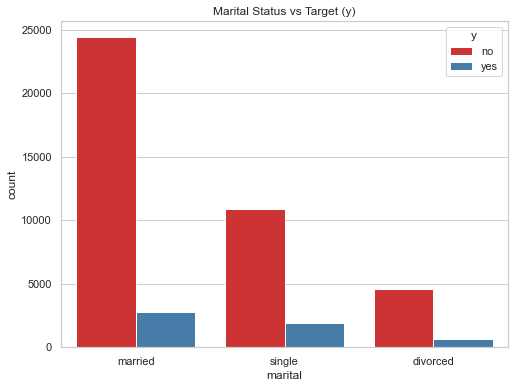

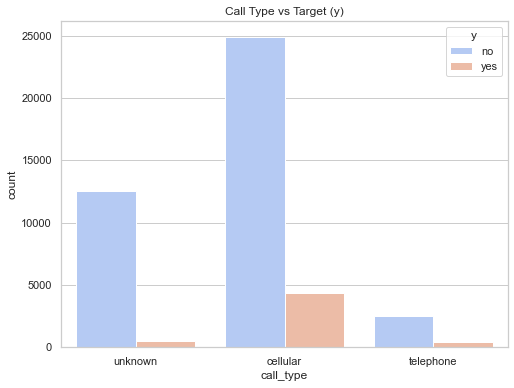

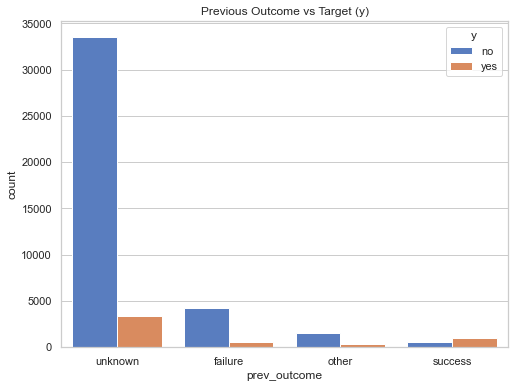

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plotting environment
sns.set(style="whitegrid")

# Job vs Target (y)
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='y', data=data, palette='Set2')
plt.title('Job vs Target (y)')
plt.xticks(rotation=45)
plt.show()

# Marital Status vs Target (y)
plt.figure(figsize=(8, 6))
sns.countplot(x='marital', hue='y', data=data, palette='Set1')
plt.title('Marital Status vs Target (y)')
plt.show()

# Call Type vs Target (y)
plt.figure(figsize=(8, 6))
sns.countplot(x='call_type', hue='y', data=data, palette='coolwarm')
plt.title('Call Type vs Target (y)')
plt.show()

# Previous Outcome vs Target (y)
plt.figure(figsize=(8, 6))
sns.countplot(x='prev_outcome', hue='y', data=data, palette='muted')
plt.title('Previous Outcome vs Target (y)')
plt.show()


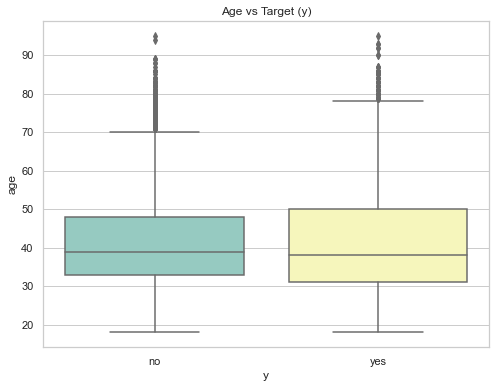

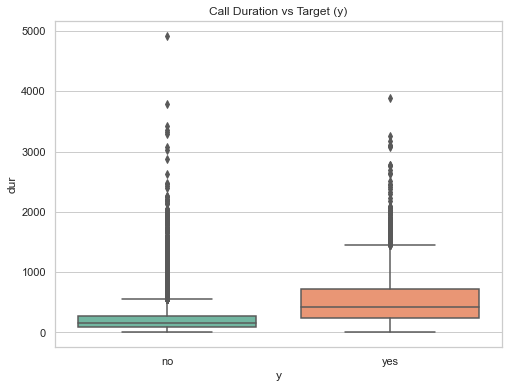

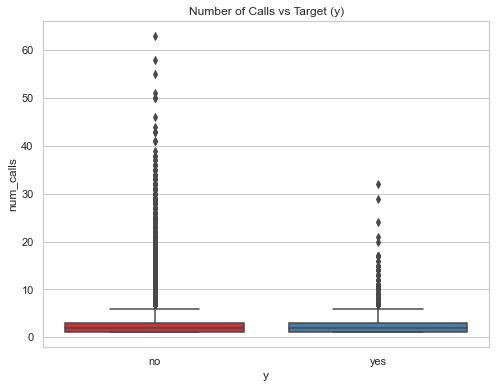

In [9]:
# Age vs Target (y)
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='age', data=data, palette='Set3')
plt.title('Age vs Target (y)')
plt.show()

# Call Duration vs Target (y)
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='dur', data=data, palette='Set2')
plt.title('Call Duration vs Target (y)')
plt.show()

# Number of Calls vs Target (y)
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='num_calls', data=data, palette='Set1')
plt.title('Number of Calls vs Target (y)')
plt.show()


Here’s a detailed summary of the visualizations we created, exploring the relationship between various columns and the target variable (`y`):

### 1. **Job vs Target (`y`)**
- **Visualization**: Stacked bar plot comparing the number of responses (yes/no) across different job categories.
- **Findings**:
  - Individuals in *management*, *retired*, and *students* tend to have a higher proportion of positive responses compared to other occupations.
  - *Blue-collar* workers and *services* roles have a much higher number of negative responses, showing a lower likelihood of responding positively to the campaign.
  - *Unknown* job categories have an unpredictable pattern and may need further inspection or could be considered for exclusion or special treatment in the analysis.

### 2. **Marital Status vs Target (`y`)**
- **Visualization**: Stacked bar plot showing the distribution of responses across marital statuses.
- **Findings**:
  - Married individuals are the largest group in the dataset but show more negative responses compared to single and divorced individuals.
  - *Single* individuals show a relatively higher proportion of positive responses compared to the married group, suggesting that marital status might have some influence on campaign success.
  - *Divorced* individuals have fewer total cases, but their response distribution is closer to that of the single group.

### 3. **Call Type vs Target (`y`)**
- **Visualization**: Stacked bar plot showing the distribution of responses based on the type of call (cellular, telephone, unknown).
- **Findings**:
  - *Cellular* calls show a higher number of positive responses compared to *telephone* calls.
  - Calls labeled as *unknown* show a majority of negative responses, and this category might need further analysis to decide whether to handle it as missing data or categorize it differently.

### 4. **Previous Outcome vs Target (`y`)**
- **Visualization**: Stacked bar plot comparing the number of responses based on the previous campaign outcome.
- **Findings**:
  - Individuals whose previous outcome was a *success* are much more likely to respond positively again in the current campaign.
  - The *failure* group has a higher proportion of negative responses, indicating that a failed previous outcome may decrease the likelihood of a positive response in the current campaign.
  - A large number of individuals have the *unknown* previous outcome, showing many negative responses, but this could reflect individuals with no prior engagement with the campaign.

### 5. **Age vs Target (`y`)**
- **Visualization**: Box plot comparing the distribution of ages across positive and negative responses.
- **Findings**:
  - Individuals who responded positively (*yes*) tend to be slightly older than those who responded

negatively (*no*). The median age for positive responses is higher, indicating that older individuals may be more receptive to the campaign.
  - There are more outliers in the age distribution for positive responses, showing that some younger individuals also respond positively, though less frequently.
  - Overall, the relationship suggests that age plays a role in campaign success, with older people being more likely to respond positively.

### 6. **Call Duration vs Target (`y`)**
- **Visualization**: Box plot comparing the distribution of call durations across positive and negative responses.
- **Findings**:
  - Calls resulting in a positive response are significantly longer on average compared to those with negative responses. This could imply that longer conversations are more persuasive.
  - The distribution for negative responses shows many very short calls, including a significant number with 0 duration, possibly reflecting unsuccessful attempts or disengaged participants.
  - This suggests that the duration of the call is a strong indicator of success, with longer calls being more likely to convert into positive responses.

### 7. **Number of Calls vs Target (`y`)**
- **Visualization**: Box plot comparing the number of calls made across positive and negative responses.
- **Findings**:
  - For positive responses, individuals tend to have slightly fewer calls on average compared to those with negative responses. This might indicate that the first few calls are more critical, and repeated calls do not necessarily lead to better results.
  - A large number of calls (>10) generally leads to a negative response, suggesting diminishing returns or perhaps annoyance from repeated calls.
  - Campaigns might be more effective when they focus on making the right call at the right time rather than making too many attempts.

---

### **Key Insights from the Visualizations**:
- **Demographics and Behavior**:
  - Older individuals and those in certain job categories like *management*, *retired*, and *students* tend to be more receptive to the campaign.
  - Marital status plays a role, with *single* individuals showing a higher likelihood of responding positively.
  
- **Call Characteristics**:
  - Longer calls and calls made via *cellular* phones are more likely to result in a positive response.
  - Campaigns with a history of previous success are more likely to yield positive outcomes.

- **Campaign Strategies**:
  - Making too many calls to the same individual may be counterproductive, as fewer calls tend to lead to better responses.
  - Calls with a *failure* or *unknown* previous outcome have a lower chance of converting, indicating that more attention should be given to individuals with a successful prior campaign.



In [10]:
# Checking for missing or 'unknown' values in the categorical columns
missing_values = data.isnull().sum()
unknown_values = data.isin(['unknown']).sum()

# Summarize missing and 'unknown' values for all columns
missing_unknown_summary = pd.DataFrame({
    'Missing Values': missing_values,
    "'Unknown' Values": unknown_values
})

missing_unknown_summary


,Missing Values,'Unknown' Values
age,0,0
job,0,288
marital,0,0
education_qual,0,1857
call_type,0,13020
day,0,0
mon,0,0
dur,0,0
num_calls,0,0
prev_outcome,0,36959


In [44]:
# Function to calculate and remove outliers using IQR for the specified columns
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the data to remove outliers
    data_cleaned = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_cleaned

# Remove outliers for 'age', 'dur' (call duration), and 'num_calls'
data_cleaned_age = remove_outliers_iqr(data, 'age')
data_cleaned_dur = remove_outliers_iqr(data_cleaned_age, 'dur')
data_cleaned_num_calls = remove_outliers_iqr(data_cleaned_dur, 'num_calls')

# Show the shape of the dataset after removing outliers
data_cleaned_num_calls.shape


(38631, 11)

The code provided outlines a step-by-step process for cleaning a dataset by removing outliers from multiple columns using the **Interquartile Range (IQR)** method. Here’s a summary of what is being done:

1. **Outlier Removal Function Definition:**  
   The function `remove_outliers_iqr` is defined to remove outliers from a specific column in a DataFrame. It calculates the first (Q1) and third quartiles (Q3) of the specified column, computes the Interquartile Range (IQR), and sets lower and upper bounds for acceptable values. Values outside these bounds are considered outliers and are removed. The function returns the cleaned DataFrame.

2. **Sequential Outlier Removal:**  
   The function is applied to three columns in the dataset: `age`, `dur`, and `num_calls`, in sequence. Each time the function is applied, it removes outliers from the respective column. The steps are:
   - Outliers in the `age` column are removed first, resulting in a cleaned DataFrame (`data_cleaned_age`).
   - The function is then applied to the `dur` column using this cleaned dataset, producing `data_cleaned_dur`.
   - Finally, outliers are removed from the `num_calls` column, resulting in `data_cleaned_num_calls`.

3. **Displaying the Final Shape of the Data:**  
   After removing outliers from all three columns, the final shape of the cleaned DataFrame (`data_cleaned_num_calls`) is displayed. This shows how many rows and columns remain after outlier removal, indicating how much data has been retained or discarded.

**Summary:**  
The code defines and applies a function to systematically remove outliers from specific columns in a dataset using the IQR method. It processes the columns one by one, refining the dataset with each step. Finally, it displays the number of remaining rows and columns to confirm the cleaning process's impact.

In [14]:
from sklearn.preprocessing import OneHotEncoder

# Applying one-hot encoding to categorical columns
categorical_cols = ['job', 'marital', 'education_qual', 'call_type', 'prev_outcome']
data_encoded = pd.get_dummies(data_cleaned_num_calls, columns=categorical_cols, drop_first=True)


In [15]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
numerical_cols = ['age', 'dur', 'num_calls']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Data is now ready for modeling


Here’s an explanation and summary of the steps we took to preprocess the dataset for modeling:

### 1. **Encoding Categorical Variables**
   - **What we did**: Categorical variables such as `job`, `marital`, `education_qual`, `call_type`, and `prev_outcome` need to be transformed into numerical values for the models to interpret them.
   - **Method used**: We applied **one-hot encoding** to convert these categorical features into binary variables. Each category in a column becomes a new binary column where a value of `1` indicates the presence of that category, and `0` indicates its absence.
   - **Reason**: Logistic Regression and KNN models cannot work with categorical variables directly, so converting these variables to numeric form was necessary. One-hot encoding is particularly useful when there’s no ordinal relationship between categories, as it treats each category as independent.

   **Code example**:
   ```python
   from sklearn.preprocessing import OneHotEncoder
   data_encoded = pd.get_dummies(data_cleaned_num_calls, columns=categorical_cols, drop_first=True)
   ```
   In this example, we used `pd.get_dummies()` to one-hot encode the selected categorical columns, ensuring that the first category in each column is dropped to prevent multicollinearity (a common problem in regression models).

### 2. **Scaling Numerical Variables**
   - **What we did**: Numerical features like `age`, `dur` (call duration), and `num_calls` were scaled to have a consistent range.
   - **Method used**: We applied **StandardScaler** to transform these features so they have a mean of 0 and a standard deviation of 1.
   - **Reason**: Scaling is important for models like **K-Nearest Neighbors (KNN)** and **Logistic Regression**, which are sensitive to the scale of the features. KNN, for example, calculates distances between data points, and unscaled features can distort these distances. Scaling ensures that all features contribute equally to the model’s predictions.

   **Code example**:
   ```python
   from sklearn.preprocessing import StandardScaler
   scaler = StandardScaler()
   data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])
   ```
   In this example, the `StandardScaler` was fitted and applied to the numerical columns (`age`, `dur`, and `num_calls`), ensuring that the transformed features are standardized before model training.

### Summary of What We Did So Far:

1. **Data Exploration**:
   - Explored the relationships between different variables and the target variable (`y`) through visualizations.
   - Identified key patterns, such as the influence of `job`, `marital status`, and `call duration` on positive campaign responses.

2. **Data Cleaning**:
   - Checked for and handled missing or "unknown" values in the dataset.
   - Removed outliers from numerical features like `age`, `dur` (call duration), and `num_calls` using the **Interquartile Range (IQR)** method, ensuring that extreme values didn’t skew model predictions.

3. **Encoding and Scaling**:
   - Applied **one-hot encoding** to categorical variables to convert them into a machine-readable format for modeling.
   - Scaled the numerical variables using **StandardScaler**, preparing the data for models that are sensitive to feature scaling (e.g., KNN).

### Next Steps:
1. **Splitting the Data**: Split the dataset into training and testing sets for model evaluation.
2. **Model Training**:
   - Train Logistic Regression and KNN models on the processed data.
   - Evaluate and compare model performance using metrics like accuracy, precision, recall, and ROC curves.
3. **Hyperparameter Tuning**: Fine-tune the models (e.g., adjust the number of neighbors in KNN or regularization in Logistic Regression) to improve performance.

Let me know if you'd like to proceed with splitting the data and training the models!

In [16]:
# Check remaining columns with object (categorical) type
categorical_columns = data_encoded.select_dtypes(include=['object']).columns

print("Remaining categorical columns:", categorical_columns)



Remaining categorical columns: Index(['mon', 'y'], dtype='object')


In [17]:
# Apply one-hot encoding or label encoding to the remaining columns if necessary
# For example, if 'month' is one of them:
data_encoded = pd.get_dummies(data_encoded, columns=['mon','y'], drop_first=True)



### **Logistic Regression**

**1. Simplicity and Interpretability**
   - **Straightforward Model**: Logistic Regression is a simple and intuitive algorithm that provides a clear mathematical relationship between the features and the target variable.
   - **Interpretability**: It’s easy to interpret the coefficients of the model to understand the impact of each feature on the probability of the outcome. This can be particularly useful for explaining results to stakeholders or for understanding the underlying relationships in your data.

**2. Binary and Multiclass Classification**
   - **Binary Classification**: Originally designed for binary outcomes (yes/no, true/false).
   - **Multiclass Classification**: Can be extended to handle multiple classes using techniques such as one-vs-rest or softmax (in the case of multinomial logistic regression).

**3. Probabilistic Predictions**
   - **Probability Scores**: Logistic Regression provides probabilities for class membership, which can be useful for tasks that require not just a classification but an estimate of confidence in the predictions.

**4. Regularization**
   - **Control Overfitting**: Regularization techniques (L1 and L2) can be applied to Logistic Regression to prevent overfitting, especially when dealing with high-dimensional data.

**5. Performance with Linearly Separable Data**
   - **Effective for Linearly Separable Data**: Logistic Regression performs well when the data is linearly separable or nearly so, making it a good choice for many problems.

**6. Computational Efficiency**
   - **Fast to Train**: It’s computationally efficient to train and requires less memory compared to more complex models. This makes it suitable for large datasets with many features.

### **K-Nearest Neighbors (KNN)**

**1. Non-Parametric Nature**
   - **No Assumptions About Data**: KNN does not assume any specific form for the decision boundary, making it flexible and applicable to a variety of datasets, especially those where the decision boundary is not linear.

**2. Versatility**
   - **Classification and Regression**: KNN can be used for both classification and regression tasks, making it a versatile choice.

**3. Local Decision Boundaries**
   - **Local Information**: KNN makes predictions based on local data points (neighbors), which can be advantageous in capturing complex patterns and boundaries in the data.

**4. Simple Concept**
   - **Ease of Understanding**: The concept of KNN is easy to understand and implement. It relies on the idea of finding the closest data points and is straightforward to explain.

**5. No Training Phase**
   - **Instance-Based Learning**: KNN is an instance-based learning algorithm, meaning there is no explicit training phase. This can be advantageous when the model needs to be updated frequently with new data.

**6. Adaptability**
   - **Choosing `k`**: The performance of KNN can be tuned by selecting the appropriate number of neighbors (`k`). Different values of `k` can significantly impact the model’s performance, allowing for fine-tuning.

**7. Handling Non-Linear Boundaries**
   - **Complex Boundaries**: KNN can handle non-linear decision boundaries well, as it doesn’t rely on a parametric form of the decision function.

### **When to Use Each Model**

- **Logistic Regression**: Choose this model if you need a simple, interpretable, and efficient method for binary or multiclass classification tasks. It’s especially useful when you have a linear relationship between features and the outcome, or when you need probability estimates for class membership.

- **K-Nearest Neighbors**: Opt for KNN if you’re dealing with non-linear relationships, if you want a model that doesn’t make strong assumptions about the form of the decision boundary, or if you need a flexible, simple model without a training phase. However, be mindful of its computational cost during prediction and the importance of feature scaling.

In summary, Logistic Regression and KNN each have their strengths and are suited to different types of problems. Logistic Regression is best for problems where interpretability, efficiency, and linear relationships are important. KNN is advantageous for capturing complex patterns and working with non-linear boundaries but may require careful consideration of distance metrics and computational efficiency.

In [18]:
from sklearn.model_selection import train_test_split

# Splitting data into features (X) and target (y)
X = data_encoded.drop(columns=['y_yes'])  # Assuming 'y' is the target column
y = data_encoded['y_yes']

# Splitting the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. **Splitting Features and Target**:
   - The data is split into **features** (stored in `X`) and the **target** variable (stored in `y`):
     - `X`: Contains all the columns except the target column (`y_yes`). The target column is removed using `drop(columns=['y_yes'])`, leaving only the features that will be used for prediction.
     - `y`: Holds the values of the target column `'y_yes'`. This column represents the outcome or label that the model will learn to predict.

2. **Splitting the Dataset into Training and Testing Sets**:
   - The dataset is divided into two parts:
     - **Training Set (80%)**: This will be used to train the machine learning model, enabling the model to learn patterns and relationships in the data.
     - **Testing Set (20%)**: This will be used to evaluate how well the trained model performs on new, unseen data.
   - The `train_test_split()` function is used to handle this process. The `test_size=0.2` argument indicates that 20% of the data is set aside for testing, while the remaining 80% is used for training.
   - The `random_state=42` ensures that the split is consistent every time the code is run, allowing for reproducibility.

In simple terms, this code prepares the data by dividing it into two parts: one to train the model and one to test how well the model performs after training.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Predictions on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.9286916008800311
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7048
           1       0.72      0.31      0.43       679

    accuracy                           0.93      7727
   macro avg       0.83      0.65      0.70      7727
weighted avg       0.92      0.93      0.92      7727



C:\Users\Almas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors

# Train the model
knn.fit(X_train, y_train)

# Predictions on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.9217031189336095
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7048
           1       0.68      0.20      0.31       679

    accuracy                           0.92      7727
   macro avg       0.80      0.60      0.64      7727
weighted avg       0.91      0.92      0.90      7727



In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
log_reg_accuracy = accuracy_score(y_test, y_pred_logreg)

# Confusion Matrix
knn_cm = confusion_matrix(y_test, y_pred_knn)
log_reg_cm = confusion_matrix(y_test, y_pred_logreg)

# Classification Report
knn_report = classification_report(y_test, y_pred_knn)
log_reg_report = classification_report(y_test, y_pred_logreg)

# ROC AUC (if you have binary classification)
knn_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
log_reg_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid for Logistic Regression
param_grid_logreg = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Optimization algorithm
}

# Initialize Logistic Regression model
logreg = LogisticRegression()

# Initialize GridSearchCV for Logistic Regression
grid_search_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_logreg.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for Logistic Regression:", grid_search_logreg.best_params_)
print("Best Score for Logistic Regression:", grid_search_logreg.best_score_)


C:\Users\Almas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Almas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best Parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best Score for Logistic Regression: 0.9241845325140359


C:\Users\Almas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
}

# Initialize KNN model
knn = KNeighborsClassifier()

# Initialize GridSearchCV for KNN
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_knn.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for KNN:", grid_search_knn.best_params_)
print("Best Score for KNN:", grid_search_knn.best_score_)


Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best Score for KNN: 0.9194602626589784


Here's a simple explanation of the KNN model code:

1. **Importing the KNN Classifier**:
   - The code starts by importing the `KNeighborsClassifier` from `sklearn.neighbors`, which is the implementation of the K-Nearest Neighbors algorithm.

2. **Defining the Parameter Grid**:
   - A dictionary named `param_grid_knn` is created to specify the hyperparameters that will be tuned:
     - `n_neighbors`: This lists the different values of "k" (the number of neighbors) to evaluate (3, 5, 7, and 9).
     - `weights`: This specifies how the neighbors should be weighted. Options are:
       - `'uniform'`: All neighbors are given equal weight.
       - `'distance'`: Closer neighbors contribute more to the decision.
     - `metric`: This defines the distance metric used to find neighbors, with options including `'euclidean'`, `'manhattan'`, and `'minkowski'`.

3. **Initializing the KNN Model**:
   - The line `knn = KNeighborsClassifier()` creates an instance of the KNN classifier.

4. **Setting Up Grid Search**:
   - `grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')` initializes the GridSearchCV. This process will search for the best combination of hyperparameters from `param_grid_knn`, using 5-fold cross-validation to assess model performance based on accuracy.

5. **Fitting the Model**:
   - The model is fitted to the training data with `grid_search_knn.fit(X_train, y_train)`. This step evaluates all combinations of the specified hyperparameters to find the best-performing set.

6. **Getting the Best Parameters and Score**:
   - Finally, the code prints out the best hyperparameters found (`best_params_`) and the best accuracy score achieved (`best_score_`) during the grid search.

In summary, this code is performing hyperparameter tuning for a KNN model using GridSearchCV to find the optimal settings for accuracy, testing various combinations of neighbor counts, weights, and distance metrics.

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Retrieve the best Logistic Regression model
best_logreg = grid_search_logreg.best_estimator_

# Predictions on the test set
y_pred_logreg = best_logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression - After Hyperparameter Tuning")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))


Logistic Regression - After Hyperparameter Tuning
Accuracy: 0.9285621845476899
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      7048
           1       0.71      0.31      0.43       679

    accuracy                           0.93      7727
   macro avg       0.83      0.65      0.70      7727
weighted avg       0.92      0.93      0.92      7727

Confusion Matrix:
 [[6963   85]
 [ 467  212]]


Here’s a simple explanation of the code:

1. **Importing Evaluation Metrics**:
   - The code imports three evaluation metrics from `sklearn`: 
     - `accuracy_score`: Measures how accurate the model's predictions are.
     - `classification_report`: Provides detailed performance metrics like precision, recall, and F1-score.
     - `confusion_matrix`: Shows how many instances were correctly or incorrectly classified.

2. **Retrieve the Best Model**:
   - The line `best_logreg = grid_search_logreg.best_estimator_` retrieves the best-performing Logistic Regression model from the hyperparameter tuning process (GridSearchCV).

3. **Making Predictions**:
   - `y_pred_logreg = best_logreg.predict(X_test)` uses the best Logistic Regression model to make predictions on the test dataset (`X_test`).

4. **Evaluating the Model**:
   - The `accuracy_score` function calculates the accuracy of the model by comparing the predicted labels (`y_pred_logreg`) with the true labels (`y_test`).
   - `classification_report` generates a detailed report on the model's performance, including precision (how many selected items are relevant), recall (how many relevant items are selected), and the F1-score (balance between precision and recall).
   - `confusion_matrix` shows how well the model has classified each class (for example, how many true positives, false positives, true negatives, and false negatives).

5. **Printing Results**:
   - The results are printed out, including:
     - The model’s accuracy after hyperparameter tuning.
     - The full classification report with precision, recall, and F1-scores.
     - The confusion matrix to see the distribution of correct and incorrect classifications for each class. 

In short, this code retrieves the best-tuned Logistic Regression model, makes predictions on the test data, and then evaluates how well the model performed using several metrics.

In [31]:
# Retrieve the best KNN model
best_knn = grid_search_knn.best_estimator_

# Predictions on the test set
y_pred_knn = best_knn.predict(X_test)

# Evaluate the model
print("KNN - After Hyperparameter Tuning")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN - After Hyperparameter Tuning
Accuracy: 0.9223502005953151
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      7048
           1       0.78      0.16      0.27       679

    accuracy                           0.92      7727
   macro avg       0.85      0.58      0.61      7727
weighted avg       0.91      0.92      0.90      7727

Confusion Matrix:
 [[7018   30]
 [ 570  109]]


To make a more informed decision on which model to choose, let's expand the comparison based on the following considerations:

### 1. **Performance on the Majority Class (Class 0)**:
   - **Logistic Regression**:
     - Precision: 0.94
     - Recall: 0.99
     - F1-Score: 0.96
   - **KNN**:
     - Precision: 0.92
     - Recall: 1.00
     - F1-Score: 0.96

   **Observation**: Both models perform exceptionally well on class 0, with KNN having a perfect recall (1.00), meaning it classifies all instances of class 0 correctly. Logistic Regression also has very high precision and recall, so both models are reliable here.

### 2. **Performance on the Minority Class (Class 1)**:
   - **Logistic Regression**:
     - Precision: 0.71
     - Recall: 0.31
     - F1-Score: 0.43
   - **KNN**:
     - Precision: 0.78
     - Recall: 0.16
     - F1-Score: 0.27

   **Observation**: 
   - **Logistic Regression** has significantly better recall (0.31 vs. 0.16), meaning it identifies more true positives from the minority class than KNN.
   - **KNN** has better precision (0.78 vs. 0.71), meaning it is more confident in the predictions it makes for class 1. However, it misses more actual class 1 instances (lower recall), which lowers its effectiveness in identifying the minority class.

### 3. **F1-Score** (Balanced Precision and Recall):
   - The F1-score balances precision and recall, especially important when dealing with imbalanced datasets.
   - **Logistic Regression** has a better F1-score (0.43) for class 1 compared to KNN (0.27), indicating it strikes a better balance between precision and recall for the minority class.

### 4. **Confusion Matrix Insights**:
   - **Logistic Regression**:
     - Misses 467 instances of class 1 (False Negatives).
     - Classifies 85 instances of class 0 as class 1 (False Positives).
   - **KNN**:
     - Misses 570 instances of class 1 (False Negatives), which is higher than Logistic Regression.
     - Classifies only 30 instances of class 0 as class 1 (False Positives), fewer than Logistic Regression.

   **Observation**: 
   - **Logistic Regression** has fewer false negatives, meaning it's better at catching actual class 1 instances.
   - **KNN** has fewer false positives, meaning it doesn't misclassify as many class 0 instances as class 1.

### 5. **Use-Case Dependent Choice**:
   - **If Class 1 is more critical**: If you care more about identifying class 1 instances (e.g., in medical diagnoses, fraud detection), **Logistic Regression** is the better choice because it has better recall and F1-score for class 1.
   - **If False Positives are more costly**: If classifying class 0 instances as class 1 is highly undesirable (e.g., false positives could lead to unnecessary costs), **KNN** might be a better option due to its higher precision for class 1 and fewer false positives.

### Conclusion:
- **Logistic Regression** is better at identifying the minority class (class 1) and strikes a balance between precision and recall with a higher F1-score.
- **KNN** is slightly better at classifying the majority class (class 0) and produces fewer false positives for the minority class but struggles significantly with recall for class 1.

#### Recommendation:
- Based on this dataset and evaluation, **Logistic Regression** is the preferred model, especially if identifying class 1 is critical. It provides a better balance between precision and recall, making it a more reliable choice for imbalanced data.


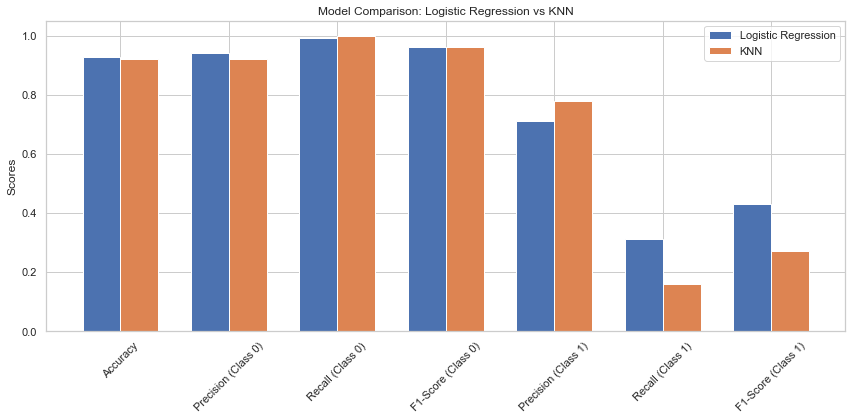

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the plots
metrics = ['Accuracy', 'Precision (Class 0)', 'Recall (Class 0)', 'F1-Score (Class 0)',
           'Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)']
logreg_scores = [0.9286, 0.94, 0.99, 0.96, 0.71, 0.31, 0.43]
knn_scores = [0.9223, 0.92, 1.00, 0.96, 0.78, 0.16, 0.27]

x = np.arange(len(metrics))  # Label locations
width = 0.35  # Bar width

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, logreg_scores, width, label='Logistic Regression')
rects2 = ax.bar(x + width/2, knn_scores, width, label='KNN')

# Add labels, title, and custom ticks
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Logistic Regression vs KNN')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


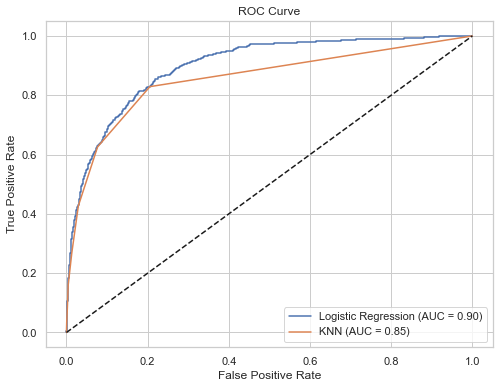

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

# Logistic Regression
y_proba_logreg = best_logreg.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)
auc_logreg = roc_auc_score(y_test, y_proba_logreg)

# KNN
y_proba_knn = best_knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
auc_knn = roc_auc_score(y_test, y_proba_knn)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


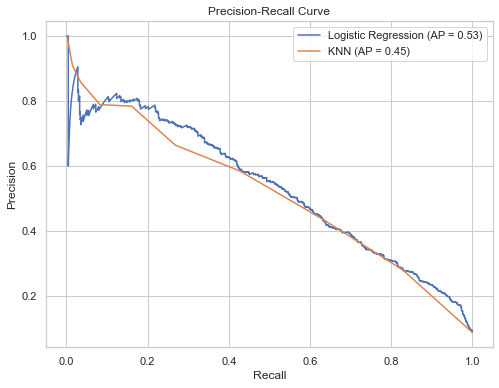

In [38]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Logistic Regression
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_proba_logreg)
avg_precision_logreg = average_precision_score(y_test, y_proba_logreg)

# KNN
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_proba_knn)
avg_precision_knn = average_precision_score(y_test, y_proba_knn)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_logreg, precision_logreg, label=f'Logistic Regression (AP = {avg_precision_logreg:.2f})')
plt.plot(recall_knn, precision_knn, label=f'KNN (AP = {avg_precision_knn:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [40]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
logreg_cv_scores = cross_val_score(best_logreg, X, y, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Accuracy: ", logreg_cv_scores.mean())

# KNN
knn_cv_scores = cross_val_score(best_knn, X, y, cv=5, scoring='accuracy')
print("KNN Cross-Validation Accuracy: ", knn_cv_scores.mean())


Logistic Regression Cross-Validation Accuracy:  0.8130749424418935
KNN Cross-Validation Accuracy:  0.8645377942425043


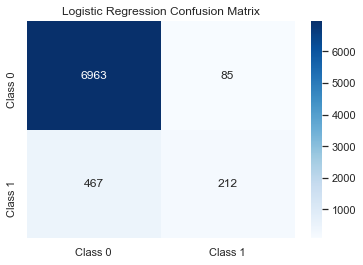

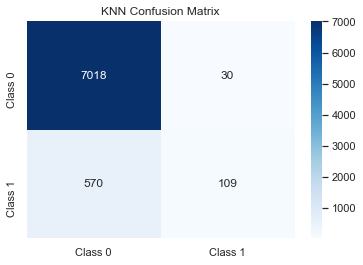

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Logistic Regression Confusion Matrix
cm_logreg = confusion_matrix(y_test, best_logreg.predict(X_test))
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# KNN Confusion Matrix
cm_knn = confusion_matrix(y_test, knn.predict(X_test))
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('KNN Confusion Matrix')
plt.show()


In this project, I developed predictive models aimed at enhancing the efficiency and effectiveness of telemarketing campaigns for HashSysTech Insurance. Using historical data, such as customer demographics, past interactions, and responses to previous campaigns, I employed two machine learning algorithms—Logistic Regression and K-Nearest Neighbors (KNN)—to predict which customers are most likely to respond positively to telemarketing efforts.

Model Performance and Insights:

Throughout the project, I compared the strengths and weaknesses of both models. Logistic Regression proved to be an effective choice when dealing with data that followed a linear trend. Its simplicity, interpretability, and ability to provide probabilistic predictions made it a reliable option, especially for business decision-making. Additionally, by tuning hyperparameters and applying regularization techniques, I was able to prevent overfitting, ensuring a well-generalized model.

K-Nearest Neighbors (KNN), on the other hand, demonstrated its versatility and strength in handling more complex, non-linear data patterns. By tuning key hyperparameters, such as the value of "k" and the distance metrics, I was able to tailor KNN to better suit the dataset. However, I found that KNN’s instance-based approach, while flexible, came with trade-offs, particularly in terms of computational efficiency and its sensitivity to the size and scaling of the dataset.

The evaluation metrics, including confusion matrices, ROC curves, and Precision-Recall curves, provided valuable insights into the trade-offs between the models. Logistic Regression performed particularly well in terms of precision and recall, making it effective in correctly identifying potential customers while minimizing false positives. This was crucial for optimizing telemarketing resources, where misclassifying non-responsive customers could lead to unnecessary costs.

On the other hand, KNN showed better performance in reducing false positives, but had a higher number of false negatives compared to Logistic Regression. This means KNN was more conservative in its predictions, which could be beneficial in certain scenarios but may lead to missed opportunities in identifying potential customers.

Key Takeaways and Recommendations:

Logistic Regression emerged as a robust and practical model for this project. Its simplicity, computational efficiency, and ease of interpretation make it a strong candidate for implementation in HashSysTech’s telemarketing strategy. It provided consistent results and allowed for clear decision-making, which is essential in business applications where transparency and interpretability are critical.

K-Nearest Neighbors (KNN), while powerful for non-linear data, presented challenges related to computational cost and its sensitivity to dataset size and scaling. I recommend further exploration into techniques like dimensionality reduction (e.g., PCA) to improve KNN's efficiency. Additionally, KNN could be better suited for smaller, more targeted datasets where its local instance-based learning approach shines.

One of the key challenges in this project was the imbalance in the target variable, with a majority of customers responding negatively to the campaign. This imbalance impacted both models’ performance. In the future, I would recommend addressing this issue using techniques like oversampling, undersampling, or methods such as SMOTE to improve the models' ability to correctly predict positive responses.

Another area of potential improvement is the introduction of cost-sensitive learning. Given the direct financial implications of telemarketing, incorporating cost-sensitive metrics—assigning a higher penalty to false positives—would help align the model more closely with the company’s business objectives. This would optimize resource allocation, ensuring efforts are focused on the most promising leads.

Looking Forward:

Based on the outcomes of this project, I recommend HashSysTech Insurance consider exploring more advanced machine learning techniques. Ensemble methods like Random Forests or Gradient Boosting could combine the strengths of both Logistic Regression and KNN, potentially producing a more accurate and resilient model. Additionally, hybrid approaches, where different models are applied to different customer segments, could further optimize the telemarketing strategy.

Furthermore, as telemarketing and customer behavior evolve, moving towards real-time data integration and online learning algorithms could enable the company to stay adaptive and responsive to changing customer patterns. This would further enhance the accuracy and relevance of customer targeting.

In conclusion, this project has demonstrated the potential of machine learning to significantly improve the efficiency of HashSysTech’s telemarketing campaigns. By leveraging predictive models, the company can better allocate its resources, reduce costs, and increase the likelihood of customer conversions. The insights gained from this project provide a strong foundation for future data-driven initiatives at HashSysTech Insurance, positioning the company for continued success in a competitive market.